<a href="https://colab.research.google.com/github/melihkurtaran/MachineLearning/blob/main/SelfOrganizingMaps/SelfOrganizingMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Self-Organizing Maps (SOM) Project**

Author: Melih Kurtaran

This project use the libraries minisom (https://github.com/JustGlowing/minisom), scikit-learn (https://scikit-learn.org) and matplotlib (https://matplotlib.org/).

Installation of minisom

In [46]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [47]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

My group number is 11 so the classes I use 2, 5 and 7.

In [48]:
# Load the digits dataset
digits = load_digits()

# Create a boolean mask for the samples that correspond to class 2, 5, 7
mask = (digits.target == 2) | (digits.target == 5) | (digits.target == 7)

# Apply the mask to the data and target arrays
X = digits.data[mask]
y = digits.target[mask]

Plotting examples from each class

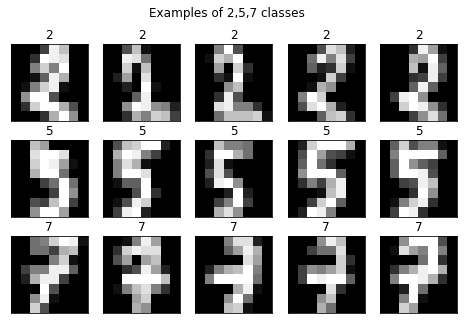

In [49]:
#Select some examples of each class
examples_2 = X[y == 2][:5]
examples_5 = X[y == 5][:5]
examples_7 = X[y == 7][:5]

# Plot the examples
fig, axes = plt.subplots(3, 5, figsize=(8, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle("Examples of 2,5,7 classes")
for ax, example in zip(axes[0], examples_2):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("2")
for ax, example in zip(axes[1], examples_5):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("5")
for ax, example in zip(axes[2], examples_7):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("7")

plt.show()

# **T1 - Define and train a rectangular SOM**

## **a) Split the dataset into train and test**

80% of the data is set as training and 20% is set for testing.

In [50]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=642)

## **b) Define the size of the rectangular SOM according to the recommendations**

The recommended size for the SOM is to have the number of neurons in the grid be between the square root of the number of training samples and twice that value. So the size of the grid should be roughly proportional to the square root of the number of samples in the training dataset. This can help ensure that the SOM is able to capture the underlying structure in the data while also avoiding overfitting.

In [51]:
len(X_train)

430

Based on the MiniSOM library recommendations and the fact that we have 403 training samples, the size of your SOM grid can be determined as follows:

The recommended number of neurons in the grid is between the square root of the number of training samples and twice that value. In this case, the square root of 403 is approximately 20.

So, a grid size of 20x20 or 25x16 would be a good starting point. Since we need to implement a rectangular SOM for T1, we use grid size of 25x16.

## **c) Train the SOM using the on-line version**

In [59]:
# Initialize the SOM
som = MiniSom(25, 16, X_train.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM for 3 attempts and keep track of the errors
best_online_som = None
best_qe = None
best_te = None

for i in range(3):
    som.train_random(X_train, 100)
    qe = som.quantization_error(X)
    te = som.topographic_error(X)
    if (best_qe is None or qe < best_qe) or (best_te is None or te < best_te):
        best_online_som = som
        best_qe = qe
        best_te = te
        
    print(f"Attempt {i+1} - Quantization error: {qe:.4f} - Topographic error: {te:.4f}")

print(f"Best Online SOM - Quantization error: {best_qe:.4f} - Topographic error: {best_te:.4f}")

Attempt 1 - Quantization error: 23.7746 - Topographic error: 0.1059
Attempt 2 - Quantization error: 22.3983 - Topographic error: 0.0428
Attempt 3 - Quantization error: 21.4397 - Topographic error: 0.0558
Best Online SOM - Quantization error: 21.4397 - Topographic error: 0.0558


## **d) Train the SOM using the batch algorithm**

In [60]:
# Initialize the batch-SOM
batch_som = MiniSom(25, 16, X_train.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM using the batch algorithm
batch_som.train_batch(X_train, 100)

# Report on the quantization and topographic errors
qe = batch_som.quantization_error(X)
te = batch_som.topographic_error(X)
print(f"Batch SOM - Quantization error: {qe:.4f} - Topographic error: {te:.4f}")

Batch SOM - Quantization error: 23.3025 - Topographic error: 0.1747


## **e) Provide the additional performance information**

A U-matrix is a visualization of the distances between neighboring neurons in a SOM, where the darker the color, the larger the distance between neurons. The class representation map shows the activation of the neurons in the SOM for a given dataset, where each color corresponds to a different class.

i) The U-matrix and the class representation map

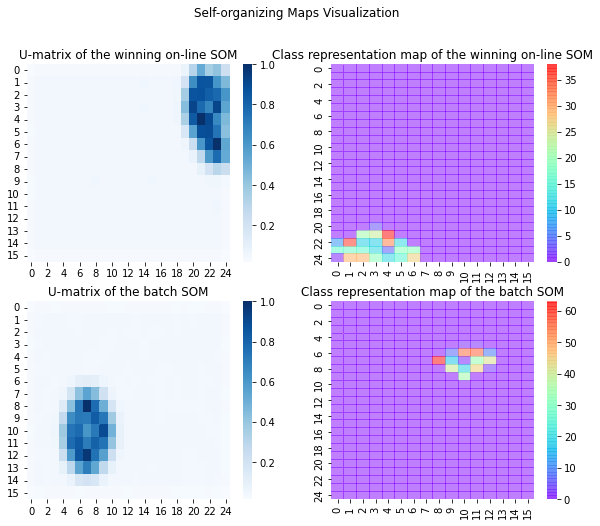

In [61]:
# Plot the U-matrix and class representation map of the winning on-line SOM
plt.figure(figsize=(10, 8))
plt.suptitle("Self-organizing Maps Visualization")

plt.subplot(2, 2, 1)
plt.title("U-matrix of the winning on-line SOM")
sns.heatmap(best_online_som.distance_map().T, cmap="Blues")

plt.subplot(2, 2, 2)
plt.title("Class representation map of the winning on-line SOM")
sns.heatmap(best_online_som.activation_response(X_train), cmap="rainbow", alpha=0.5)

# Plot the U-matrix and class representation map of the batch SOM
plt.subplot(2, 2, 3)
plt.title("U-matrix of the batch SOM")
sns.heatmap(batch_som.distance_map().T, cmap="Blues")

plt.subplot(2, 2, 4)
plt.title("Class representation map of the batch SOM")
sns.heatmap(batch_som.activation_response(X_train), cmap="rainbow", alpha=0.5)

plt.show()

ii) The confusion matrix and the classification accuracy for the test set using the SOM as a classifier

Classify function is defined

In [62]:
def classify(som, data):
    """
    Classifies each sample in the input data based 
    on the class labels assigned using the labels_map method.

    Parameters:
    som (object): The Self-Organizing Map (SOM) object.
    data (array-like): The input data to be classified.

    Returns:
    list: A list of class labels assigned to each sample in the input data.
     The length of the list is the same as the length of the input data.
    """
    # Obtain the class labels map using the labels_map method
    winmap = som.labels_map(X_train, y_train)
    
    # Identify the default class label in case the winner node is not in the winmap
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    
    # Initialize an empty list to store the class labels assigned to each sample in the input data
    result = []
    
    # Loop through each sample in the input data
    for d in data:
        # Obtain the winner node for the current sample
        win_position = som.winner(d)
        
        # Check if the winner node is in the winmap
        if win_position in winmap:
            # If the winner node is in the winmap, assign the class label that is most commonly associated with it
            result.append(winmap[win_position].most_common()[0][0])
        else:
            # If the winner node is not in the winmap, assign the default class label
            result.append(default_class)
    
    return result

Confusion Matrix Comparison

The following code calculates and visualizes the confusion matrices for two self-organizing map (SOM) classifiers, "best_online_som" and "batch_som". The confusion matrices are calculated using the classify function and confusion_matrix from scikit-learn.

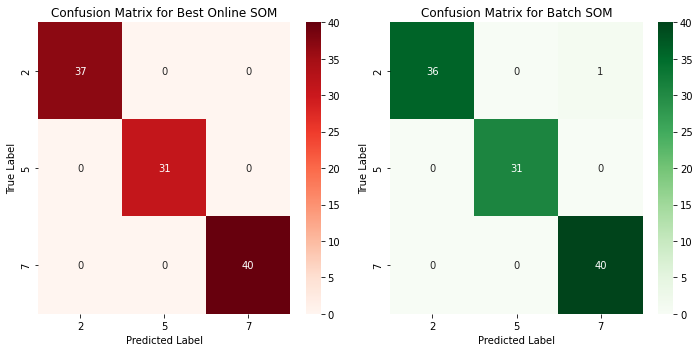

In [63]:
# calculate confusion matrices
y_pred = classify(best_online_som, X_test)
cm_best_online_som = confusion_matrix(y_test, y_pred)

y_pred = classify(batch_som, X_test)
cm_batch_som = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)

# create dataframes for confusion matrices
df1 = pd.DataFrame(cm_best_online_som, index = class_names, columns = class_names)
df2 = pd.DataFrame(cm_batch_som, index = class_names, columns = class_names)

# plot confusion matrices using seaborn
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.heatmap(df1, annot=True, cmap='Reds', fmt='d', ax=ax[0])
sns.heatmap(df2, annot=True, cmap='Greens', fmt='d', ax=ax[1])

# set title and labels
ax[0].set_title('Confusion Matrix for Best Online SOM')
ax[1].set_title('Confusion Matrix for Batch SOM')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

The classification accuracies

In [64]:
accuracy_best_online_som = np.trace(cm_best_online_som) / np.sum(cm_best_online_som)
accuracy_batch_som = np.trace(cm_batch_som) / np.sum(cm_batch_som)

print("Accuracy of Best Online SOM: ", accuracy_best_online_som)
print("Accuracy of Batch SOM: ", accuracy_batch_som)

Accuracy of Best Online SOM:  1.0
Accuracy of Batch SOM:  0.9907407407407407


# **T2 - Define and train a square SOM**

(a) Using the same train and test sets defined in T1.a)

## **b) Define the size of the square SOM according to the recommendations**

 it is recommended to start with a smaller SOM, such as a 5x5 or 10x10 map, and adjust the size as necessary based on the results obtained. The exact size of the SOM will depend on the complexity of the data and the specific problem you are trying to solve.

If the data has a simple structure, a smaller map may be sufficient to represent the structure of the data. If the data has a more complex structure, a larger map may be required to accurately capture the underlying relationships between the samples.

The size is set as 10x10

## **c) Train the SOM using the batch algorithm**

A square SOM refers to a self-organizing map (SOM) with a square grid structure. The shape of the grid structure can be specified when creating the SOM using a library such as MiniSom.

By setting x and y to the same value which is 10, we will create a square SOM

In [65]:
# initialize SOM
square_som = MiniSom(10, 10, len(X_train[0]), sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=10)

# train SOM using batch algorithm
square_som.train_batch(X_train, num_iteration=100)

# quantization error
q_error = square_som.quantization_error(X_train)

# topographic error
t_error = square_som.topographic_error(X_train)

print("Quantization Error:", q_error)
print("Topographic Error:", t_error)

Quantization Error: 23.3649531365225
Topographic Error: 0.07674418604651163


## **d) Provide the additional performance information**

i) The U-matrix and the class representation map

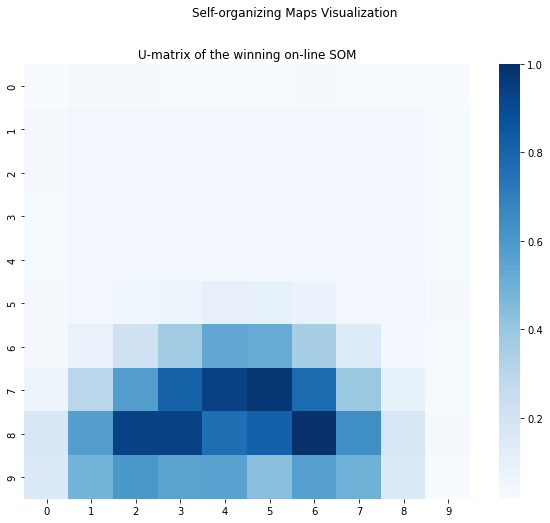

In [66]:
plt.figure(figsize=(10, 8))
plt.suptitle("Self-organizing Maps Visualization")

plt.subplot(1, 1, 1)
plt.title("U-matrix of the winning on-line SOM")
sns.heatmap(square_som.distance_map().T, cmap="Blues")

plt.show()

ii) The confusion matrix and the classification accuracy for the test set using the SOM as a classifier

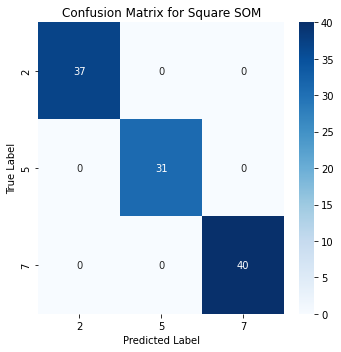

In [69]:
# calculate confusion matrices
y_pred = classify(square_som, X_test)
cm_square_som = confusion_matrix(y_test, y_pred)

class_names = np.unique(y_train)

# create dataframe for confusion matrix
df = pd.DataFrame(cm_square_som, index = class_names, columns = class_names)

# plot confusion matrix using seaborn
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(df, annot=True, cmap='Blues', fmt='d', ax=ax)

# set title and labels
ax.set_title('Confusion Matrix for Square SOM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

The classification accuracy

In [70]:
accuracy_square_som = np.trace(cm_square_som) / np.sum(cm_square_som)
print("Accuracy of Square SOM: ", accuracy_square_som)

Accuracy of Square SOM:  1.0
